C:\Users\alyon\AppData\Local\Temp\ipykernel_34252\2121964441.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Month'] = df_2023['Timestamp'].dt.month


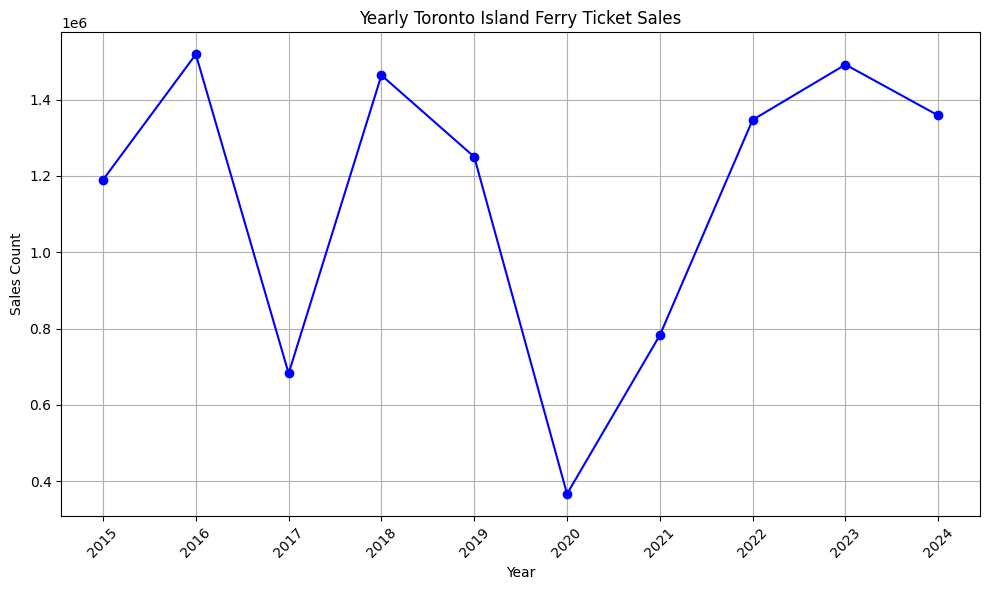

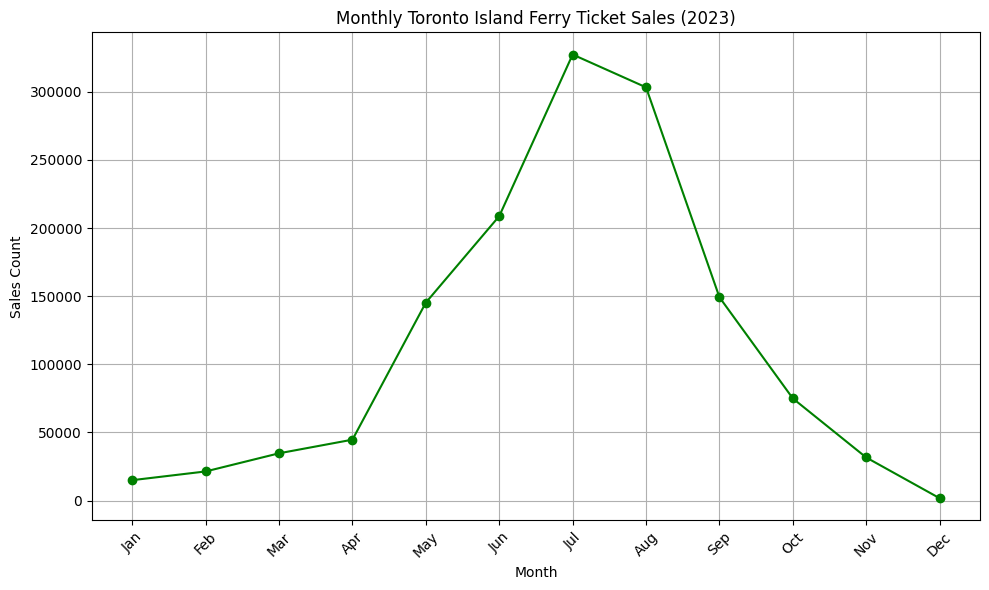

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Toronto Open Data base URL
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Dataset for Toronto Island Ferry Ticket sales
url = base_url + "/api/3/action/package_show"
params = {"id": "toronto-island-ferry-ticket-counts"}
package = requests.get(url, params=params).json()

# Retrieve CSV data 
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        # Fetch the CSV data
        url = base_url + "/datastore/dump/" + resource["id"]
        resource_dump_data = requests.get(url).text
        
        # Load the CSV data into a pandas DataFrame
        from io import StringIO
        data = StringIO(resource_dump_data)
        df = pd.read_csv(data)
        
        # Convert 'Timestamp' column to datetime format
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

        # Group by year 
        df['Year'] = df['Timestamp'].dt.year  # Extract the year
        yearly_sales = df.groupby('Year')['Sales Count'].sum().reset_index()

        # Chart 1 - the yearly ticket sales 
        plt.figure(figsize=(10, 6))
        plt.plot(yearly_sales['Year'], yearly_sales['Sales Count'], marker='o', linestyle='-', color='b')
        plt.title('Yearly Toronto Island Ferry Ticket Sales')
        plt.xlabel('Year')
        plt.ylabel('Sales Count')
        plt.xticks(yearly_sales['Year'], rotation=45)
        plt.grid(True)
        plt.tight_layout()

        # Chart 1 - Monthly sales for 2023
        # Filter the data to include only records from 2023
        df_2023 = df[df['Year'] == 2024]

        # Extract month and aggregate by month
        df_2023['Month'] = df_2023['Timestamp'].dt.month
        monthly_sales_2023 = df_2023.groupby('Month')['Sales Count'].sum().reset_index()
        all_months = pd.DataFrame({'Month': range(1, 13)})
        monthly_sales_2023 = all_months.merge(monthly_sales_2023, on='Month', how='left').fillna({'Sales Count': 0})

        # Plot the monthly ticket sales for 2023
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_sales_2023['Month'], monthly_sales_2023['Sales Count'], marker='o', linestyle='-', color='g')
        plt.title('Monthly Toronto Island Ferry Ticket Sales (2023)')
        plt.xlabel('Month')
        plt.ylabel('Sales Count')
        plt.xticks(monthly_sales_2023['Month'], 
                   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                   rotation=45)
        plt.grid(True)
        plt.tight_layout()

        plt.show()